In [1]:
# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20


In [2]:
# downloading csv
state_min = pd.read_csv("Minimum Wage Data.csv",encoding='cp1252')

In [3]:
# downloading csv
fed_min = pd.read_csv("MinimumWage.csv",encoding='cp1252')

In [4]:
# downloading csv
 = pd.read_csv("political_partyMinWage_PartyControl.csv",encoding='cp1252')

In [5]:
# downloading csv
gas_prices = pd.read_csv("PET_PRI_GND_DCUS_NUS_W.csv",encoding='cp1252')

In [6]:
# visualizing the csv
state_min

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c]
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN


In [7]:
# visualizing the csv
fed_min

,Year,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1930,$0.00,-2.30%,NaN,8.70%,-8.50%
1,1931,$0.00,-9.00%,NaN,15.90%,-6.40%
2,1932,$0.00,-9.90%,NaN,23.60%,-12.90%
3,1933,$0.00,-5.10%,NaN,24.90%,-1.20%
4,1934,$0.00,3.10%,NaN,21.70%,10.80%
5,1935,$0.00,2.20%,NaN,20.10%,8.90%
6,1936,$0.00,1.50%,NaN,16.90%,12.90%
7,1937,$0.00,3.60%,NaN,14.30%,5.10%
8,1938,$0.25,-2.10%,$0.25,19.00%,-3.30%
9,1939,$0.30,-1.40%,$0.30,17.20%,8.00%


In [8]:
# visualizing the csv
political_party

,Year,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1938,Democrat,Democrat,Democrat,Democrat,$0.25,$0.25,100.00,True,0
1,1939,Democrat,Democrat,Democrat,Democrat,$0.30,$0.05,16.67,True,1
2,1940,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,1
3,1941,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,2
4,1942,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,3
5,1943,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,4
6,1944,Democrat,Democrat,Democrat,Democrat,$0.30,$0.00,0.00,False,5
7,1945,Democrat,Democrat,Democrat,Democrat,$0.40,$0.10,25.00,True,6
8,1946,Democrat,Democrat,Democrat,Democrat,$0.40,$0.00,0.00,False,1
9,1947,Democrat,Republican,Republican,None,$0.40,$0.00,0.00,False,2


In [9]:
# visualizing the csv
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [10]:
#joining state min wage with fed
fed_state_join = state_min.merge(fed_min, how='inner')

In [11]:
fed_state_join

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote,FederalMinimumWage,MeanAnnualInflation,MinWageIndexedLastRaiseYear,UnemploymentRateDecember,GDP_AnnualGrowth
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,0.00000,0.00,0.00000,0.00,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,2.10000,15.61,2.10000,15.61,NaN,$1.60,4.20%,$1.60,3.40%,4.90%
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b),$1.60,4.20%,$1.60,3.40%,4.90%
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),0.15625,1.16,0.15625,1.16,(b),$1.60,4.20%,$1.60,3.40%,4.90%
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),1.65000,12.26,1.65000,12.26,(b),$1.60,4.20%,$1.60,3.40%,4.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25000,7.25,7.25000,7.25,[c],$7.25,1.20%,$5.99,6.70%,-3.40%
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50000,13.50,13.50000,13.50,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75000,8.75,8.75000,8.75,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25000,7.25,7.25000,7.25,NaN,$7.25,1.20%,$5.99,6.70%,-3.40%


In [12]:
#joining min wage with political party
all_plus_pol = fed_state_join.merge(political_party, how='inner')

In [13]:
all_plus_pol

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,GDP_AnnualGrowth,PresParty,SenParty,HouseParty,TrifectaFlag,FedMinWage,RateChange,PercentChange,IncreaseFlag,YearsSinceLastChange
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.80,...,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.80,2.1,...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.80,18.72 - 26.40/wk(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.80,1.25/day(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.80,1.65(b),...,4.90%,Democrat,Democrat,Democrat,Democrat,$1.60,$0.20,12.5,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2020,Virginia,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2858,2020,Washington,13.50000,13.50,7.25,7.25,13.50,13.50,258.66,13.5,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2859,2020,West Virginia,8.75000,8.75,7.25,7.25,8.75,8.75,258.66,8.75,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11
2860,2020,Wisconsin,7.25000,7.25,7.25,7.25,7.25,7.25,258.66,7.25,...,-3.40%,Republican,Republican,Democrat,None,$7.25,$0.00,0.0,False,11


In [14]:
#visuallizing the date to join with the rest of the data
gas_prices.Date
#have to change the date style

0       01/02/1995
1       01/09/1995
2       01/16/1995
3       01/23/1995
4       01/30/1995
           ...    
1356    12/28/2020
1357    01/04/2021
1358    01/11/2021
1359    01/18/2021
1360    01/25/2021
Name: Date, Length: 1361, dtype: object

In [15]:
gas_prices['t'] = pd.to_datetime(gas_prices['Date'],format='%m/%d/%Y')
gas_prices

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,t
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995-01-02
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995-01-09
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995-01-16
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995-01-23
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2020-12-28
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2021-01-04
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2021-01-11
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2021-01-18


In [16]:
#majubg a date column with only year
gas_prices['Year'] = gas_prices.t.dt.year
gas_prices = pd.DataFrame(gas_prices)

In [17]:
#droppping other darte like columns to only use one.
gas_prices = gas_prices.drop(columns = ['Date', 't'])
gas_prices

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Year
0,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995
1,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995
2,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995
3,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995
4,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635,2020
1357,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640,2021
1358,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670,2021
1359,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696,2021


In [18]:
#gas_prices.Year.drop_duplicates(keep='last')

In [19]:
update = all_plus_pol.merge(gas_prices, how='inner')

In [20]:
update

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [21]:
df = pd.DataFrame(update)

In [22]:
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.120,2.022,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.156,2.063,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.158,2.063,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.224,2.137,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619


In [30]:
df['state_wage'] = df['State.Minimum.Wage']
df['fed_wage'] = df['Federal.Minimum.Wage']
df

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,...,R3,M1,M2,M3,P1,P2,P3,D1,state_wage,fed_wage
0,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,0.00,4.25
1,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,0.00,4.25
2,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,0.00,4.25
3,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,0.00,4.25
4,1995,Alabama,0.00,0.00,4.25,7.21,4.25,7.21,152.40,...,...,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73273,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.329,2.540,2.379,2.778,2.792,2.661,2.947,2.502,5.15,7.25
73274,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.355,2.567,2.412,2.798,2.820,2.694,2.968,2.526,5.15,7.25
73275,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.361,2.565,2.407,2.800,2.821,2.693,2.973,2.559,5.15,7.25
73276,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,...,2.410,2.618,2.466,2.843,2.871,2.749,3.015,2.619,5.15,7.25


<AxesSubplot:xlabel='Year', ylabel='D1'>

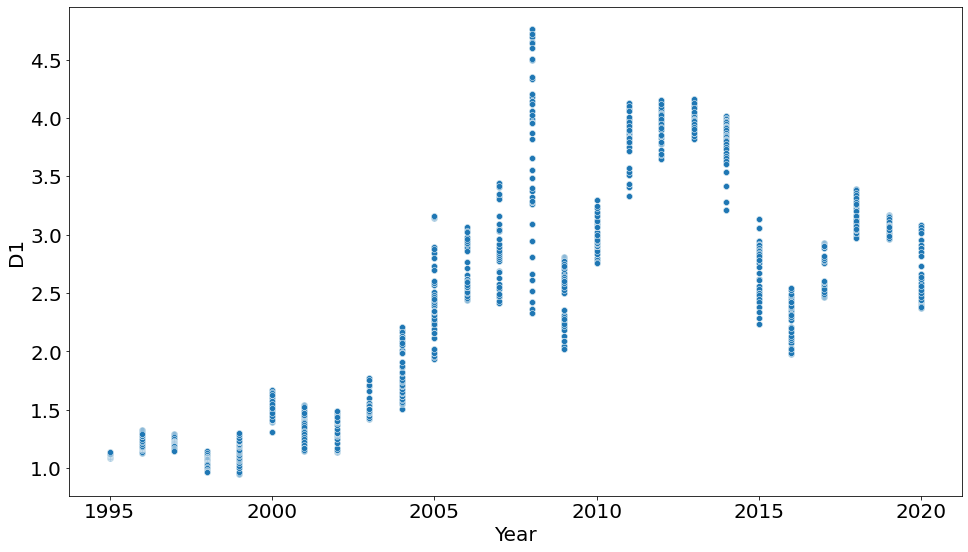

In [63]:
sns.scatterplot(x = df.Year, y = df.D1)

<AxesSubplot:xlabel='Year', ylabel='D1'>

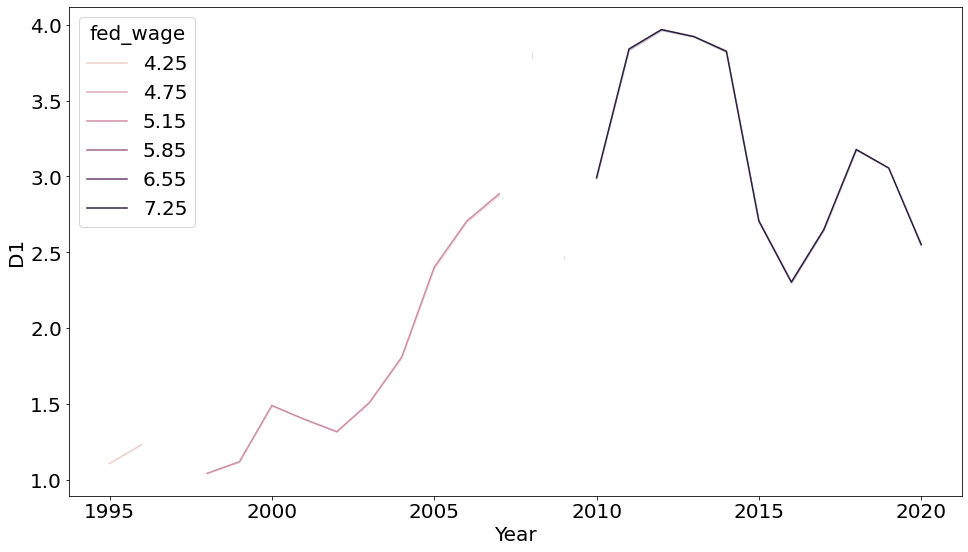

In [65]:
sns.lineplot(hue = df.fed_wage, x = df.Year,y = df.D1)

<AxesSubplot:xlabel='Year', ylabel='D1'>

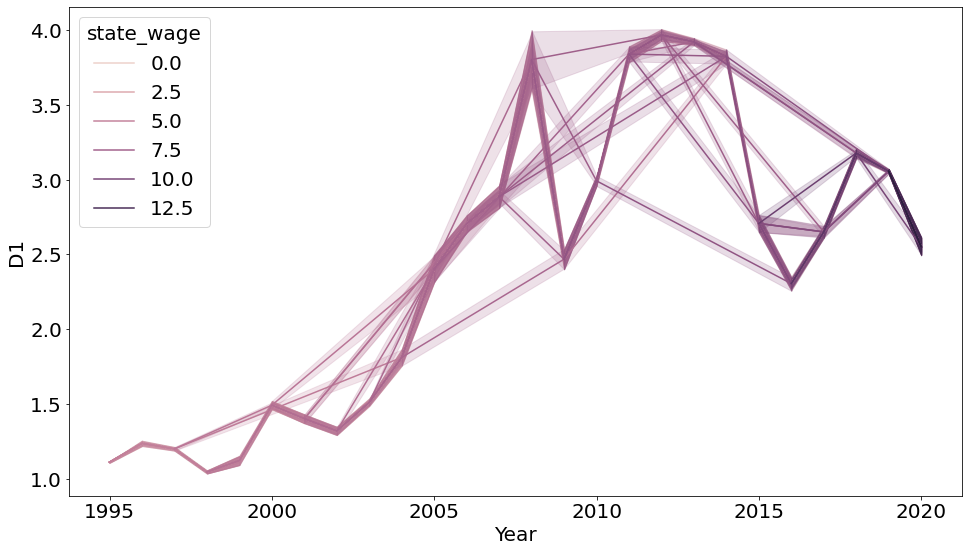

In [64]:
sns.lineplot(hue = df.state_wage,x = df.Year, y = df.D1)

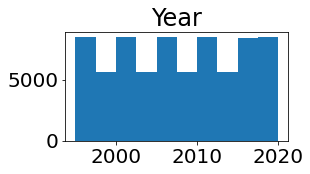

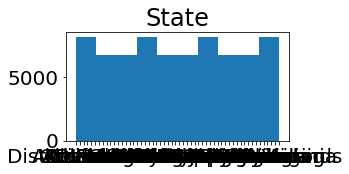

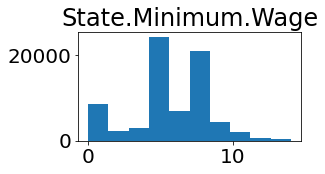

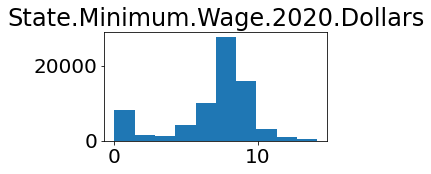

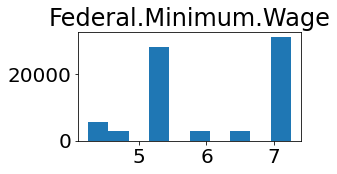

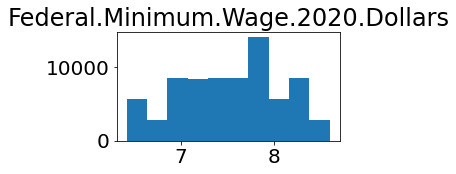

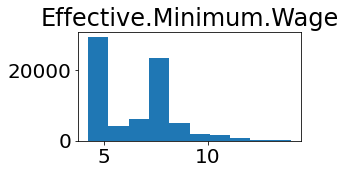

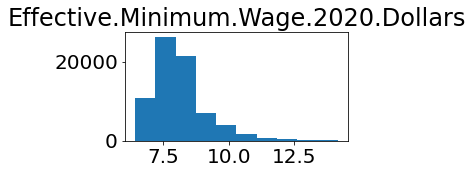

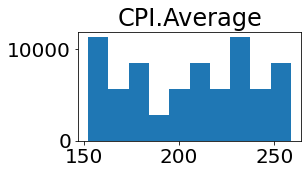

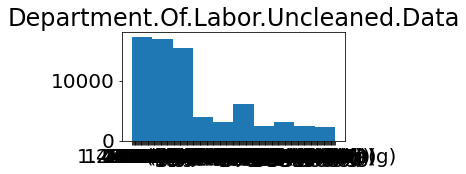

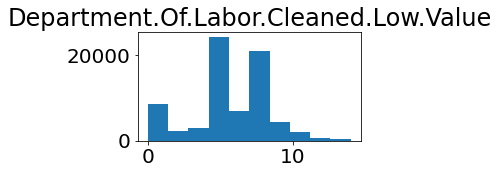

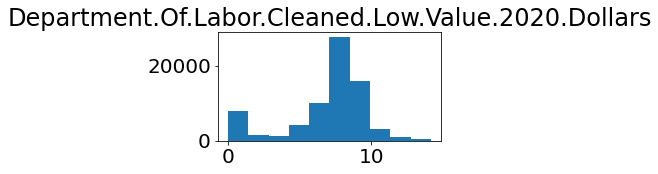

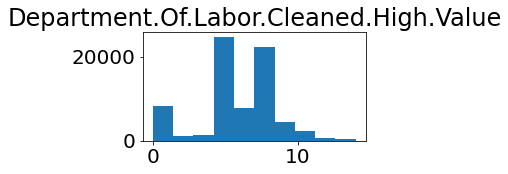

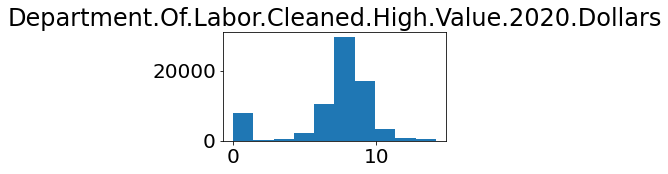

TypeError: '<=' not supported between instances of 'float' and 'str'

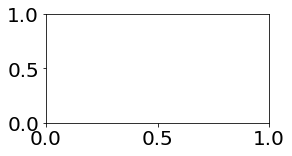

In [50]:
for col in df.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(df[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()